In [89]:
#! /usr/bin/python3

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#  Reading in log file
df = pd.read_csv('Logs/Log00020.csv', delimiter=',', low_memory=False) 

# Removing battery level, roll, pitch, K&Z Temp, and NA row that was added as a buffer.
t_fract = df['Time [UTC]']
t_fract = (t_fract.str[11:13])
df_date_time = df['Time [UTC]']
t_fract = t_fract.astype(int)

# Dropping exta info
df = df.iloc[: ,3:]
df = df.drop(columns=[" Bat [V]", " R_u [deg]", " P_u [deg]", " Temp RTC [C]"])
df = df.iloc[: ,:-2]

cols = [' UVA_u', ' UVB_u', ' White_u', ' Vis_u [lx]', ' IR_S_u',
       ' IR_M_u']
       
y = df[[' Pyro [uV]']]
X = df.drop(columns=[' Pyro [uV]', " TempOB [C]"])

# Verify Correct data
X.dropna(axis=0)
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

print((df[" Pyro [uV]"] == 0).sum())

5976


In [90]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(clf.score(X_test, y_test))

# Plotting real vs generated with tree
# Running the model on the entire set, so the shaps allign
all_predicted_Y = clf.predict(X)

0.9951699296996772


In [91]:
from datetime import date, time, datetime

# Adding time in UTC back as a pandas datetime object
utc_dt = pd.to_datetime(df_date_time)
df["Time [UTC]"] = utc_dt

# Localizing to central time
df["Time [CT]"] = df["Time [UTC]"].dt.tz_localize('UTC').dt.tz_convert('US/Central')

# Adding te predicted values to the dataframe
df["Predicted"] = all_predicted_Y

# How much each value is off by
print((df[" Pyro [uV]"] == 0).sum())

df["Error"] = abs(df[" Pyro [uV]"] - df["Predicted"]) / df[" Pyro [uV]"]
print(type(df["Error"][0]))
df.head()

5976
<class 'numpy.float64'>


,TempOB [C],Pyro [uV],UVA_u,UVB_u,White_u,Vis_u [lx],IR_S_u,IR_M_u,Time [UTC],Time [CT],Predicted,Error
0,70.60,8546.88,466,115200,9789,11783.58,0.27,0.35,2023-06-06 21:00:00,2023-06-06 16:00:00-05:00,8546.88,0.000000
1,70.65,8687.50,474,117248,9886,11938.41,0.28,0.35,2023-06-06 21:00:06,2023-06-06 16:00:06-05:00,8687.50,0.000000
2,70.71,8796.88,478,118528,10014,11918.13,0.28,0.36,2023-06-06 21:00:12,2023-06-06 16:00:12-05:00,8796.88,0.000000
3,70.76,8781.25,475,117248,9890,11921.82,0.28,0.35,2023-06-06 21:00:18,2023-06-06 16:00:18-05:00,8718.75,0.007117
4,70.82,8718.75,473,116736,9837,11849.93,0.28,0.35,2023-06-06 21:00:24,2023-06-06 16:00:24-05:00,8718.75,0.000000


In [92]:
# Indexing by time
df.index = df['Time [CT]']
dawn_df = df.between_time('03:00','07:00')
daylight_df = df.between_time('06:00','20:00')
twilight_df = df.between_time('20:00','23:00')
night_df = df.between_time('23:00','03:00')


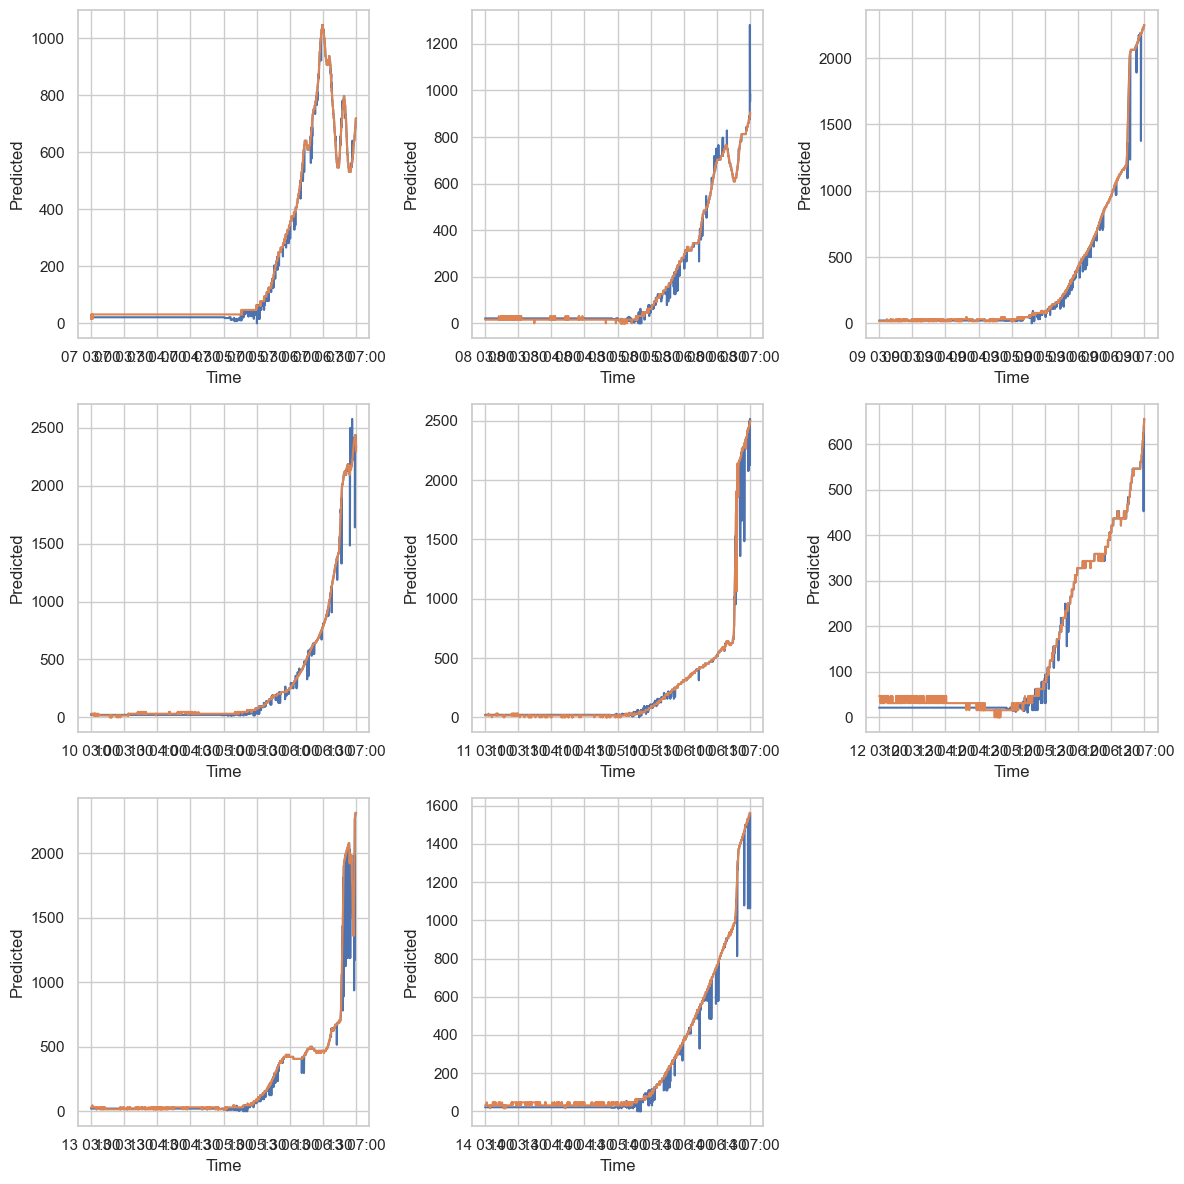

In [94]:
# Group the DataFrame by day
grouped = dawn_df.groupby(dawn_df.index.day)

# Iterate through each group and create a separate graph for each day
fig = plt.figure(figsize=(12, 12))
i = 0
for day, group in grouped:
    i = i + 1
    ax = plt.subplot(3, 3, i)
    ax.plot(group.index, group['Predicted'])
    ax.plot(group.index, group[' Pyro [uV]'])
    plt.xlabel("Time")
    plt.ylabel("Predicted")
    ax.grid(True)
    plt.tight_layout()
plt.show()


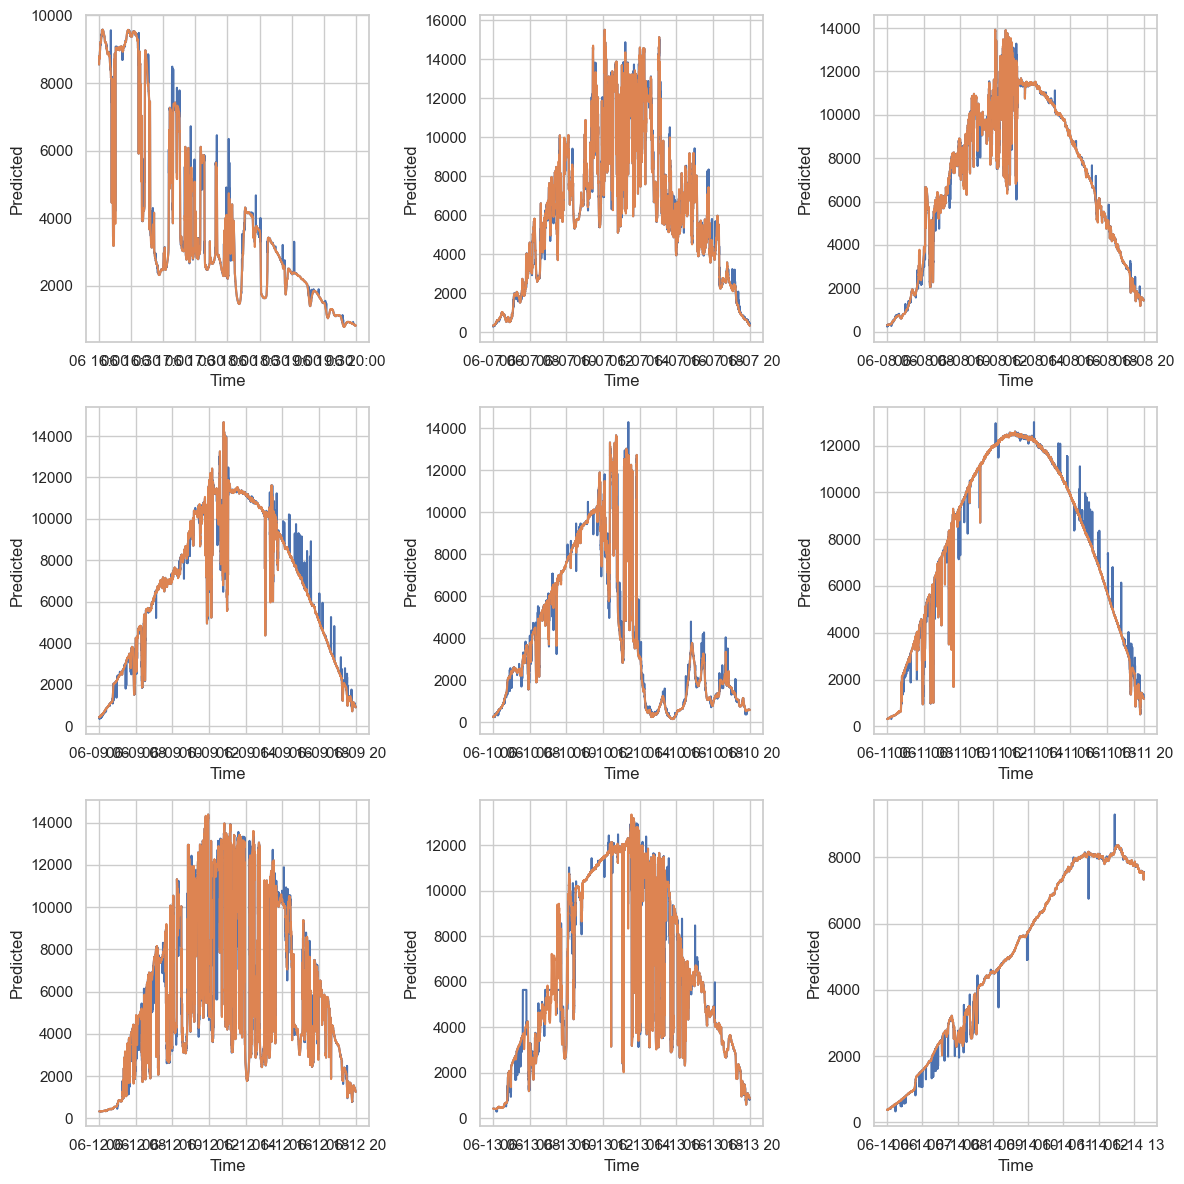

In [98]:
# Group the DataFrame by day
grouped = daylight_df.groupby(daylight_df.index.day)

# Iterate through each group and create a separate graph for each day
fig = plt.figure(figsize=(12, 12))
i = 0
for day, group in grouped:
    i = i + 1
    ax = plt.subplot(3, 3, i)
    ax.plot(group.index, group['Predicted'], label="Predicted")
    ax.plot(group.index, group[' Pyro [uV]'])
    plt.xlabel("Time")
    plt.ylabel("Predicted")
    ax.grid(True)
    plt.tight_layout()
plt.show()

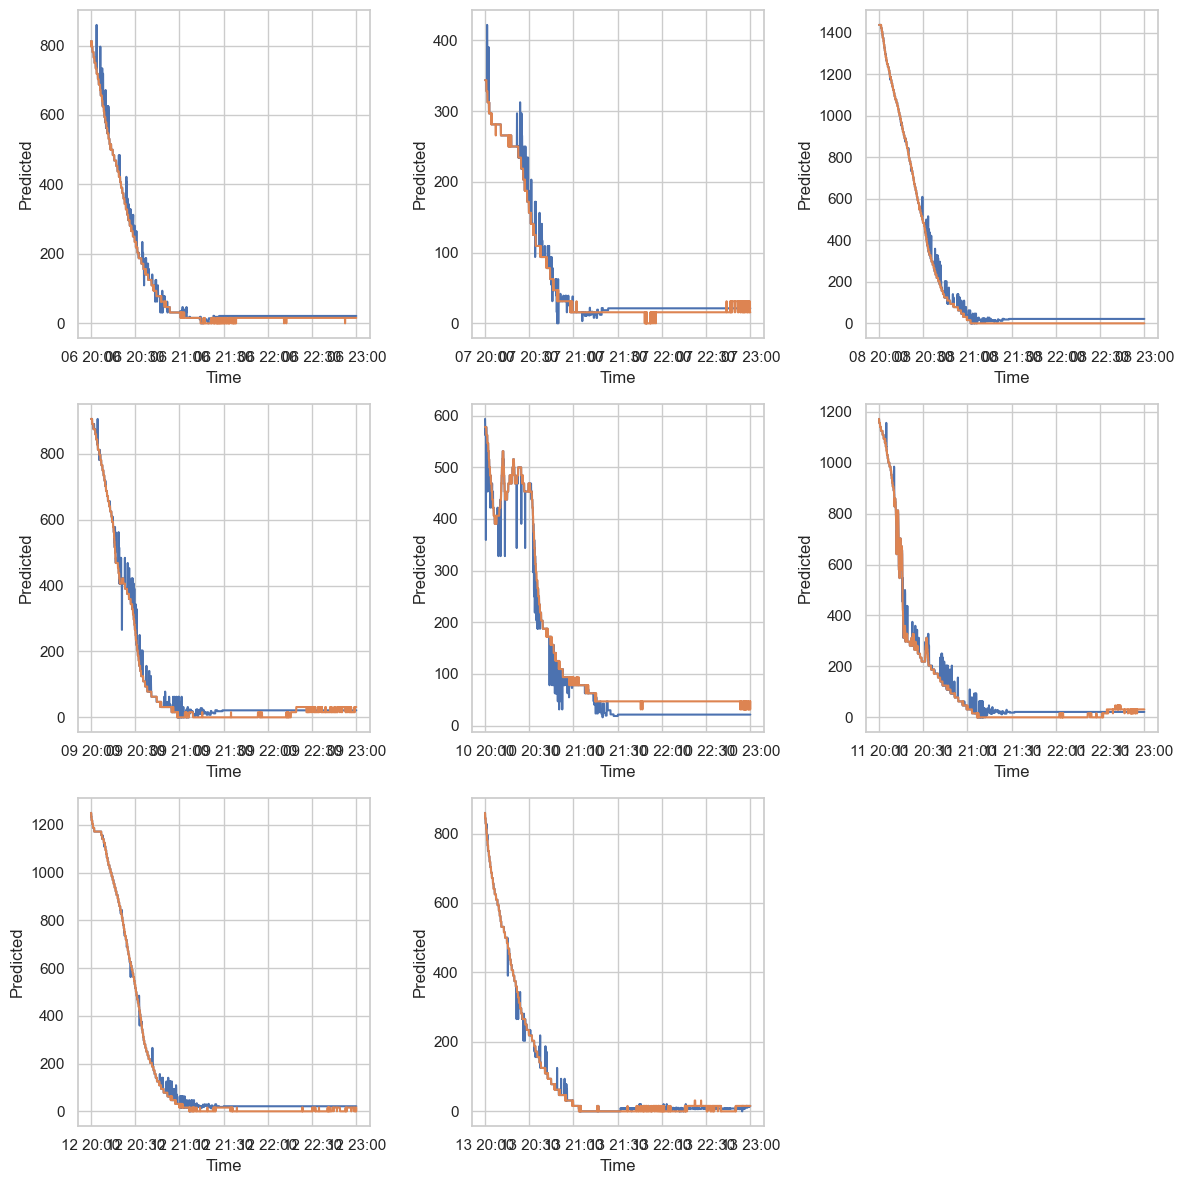

In [96]:
# Group the DataFrame by day
grouped = twilight_df.groupby(twilight_df.index.day)

# Iterate through each group and create a separate graph for each day
fig = plt.figure(figsize=(12, 12))
i = 0
for day, group in grouped:
    i = i + 1
    ax = plt.subplot(3, 3, i)
    ax.plot(group.index, group['Predicted'])
    ax.plot(group.index, group[' Pyro [uV]'])
    plt.xlabel("Time")
    plt.ylabel("Predicted")
    ax.grid(True)
    plt.tight_layout()
plt.show()

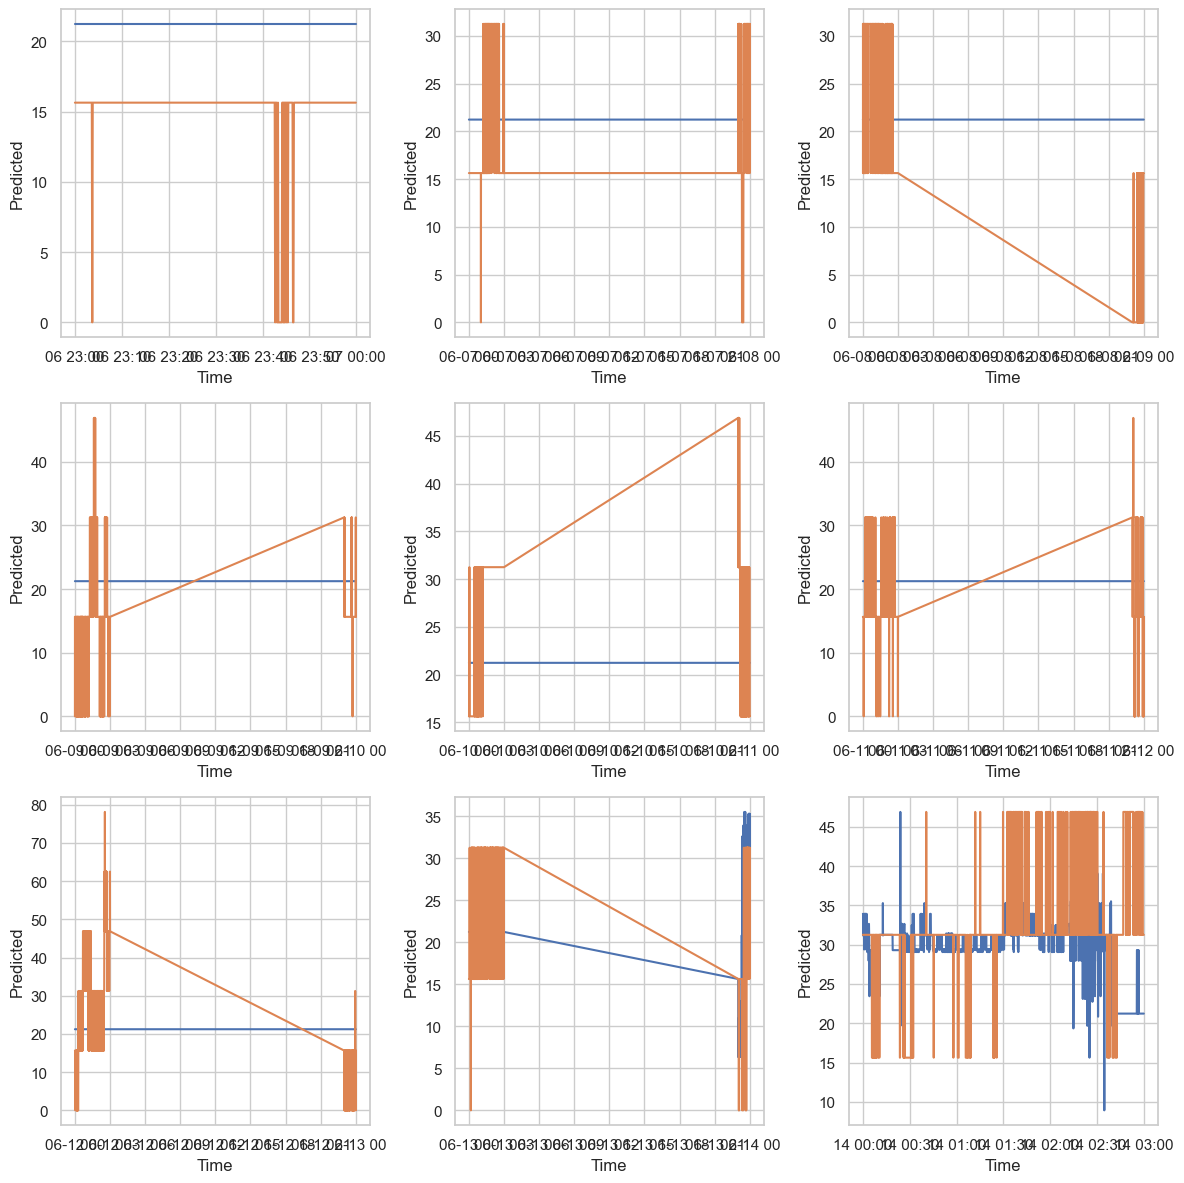

In [97]:
# Group the DataFrame by day
grouped = night_df.groupby(night_df.index.day)

# Iterate through each group and create a separate graph for each day
fig = plt.figure(figsize=(12, 12))
i = 0
for day, group in grouped:
    i = i + 1
    ax = plt.subplot(3, 3, i)
    ax.plot(group.index, group['Predicted'])
    ax.plot(group.index, group[' Pyro [uV]'])
    plt.xlabel("Time")
    plt.ylabel("Predicted")
    ax.grid(True)
    plt.tight_layout()
plt.show()